<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyIMAGE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Image</b> analysis</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyIMAGE.png"></td>
</tr>
</table>

----
# Image processing: Recovering functions

In this notebook, we recover 2D functions from the different channels of a color image.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL

----
## Reading image and restoring 2D Functions

We will read the png image with the `Image.read()` function from the `PIL` library
and convert the resulting image object to a numpy array.

<class 'numpy.ndarray'> uint8 3 (21, 51, 4)


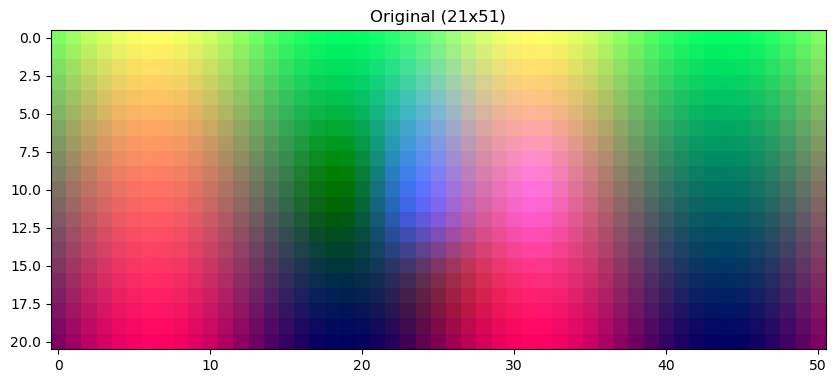

In [2]:
#image file name
infile='images/Functions2D.png'

# load image with PIL library, convert to numpy array
image = PIL.Image.open(infile)
image_arr = np.asarray(image)
print (type(image_arr),image_arr.dtype,image_arr.ndim,image_arr.shape)

# show image
fig,axs = plt.subplots(1,1,figsize=(10,5))
axs.set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs.imshow(image_arr)

----
## Channel separation

We separate each color channel to recover the three 2D functions:
$$
\begin{array}{rcl}
f_1(x,y) &=& a e^{-\left( \frac{(x-x_0)^2}{2\sigma_x^2} + \frac{(y-y_0)^2}{2\sigma_y^2} \right) } \\
f_2(x,y) &=& \sin(\frac{2\pi x}{l_x}) \cos(\frac{2\pi y}{l_y})\\
f_3(x,y) &=& \left( 1 - \frac{x}{2} + x^5 + y^3 \right) e^{(-x^2 - y^2)}
\end{array}
$$

r min/max:  0 255
g min/max:  0 254
b min/max:  0 255


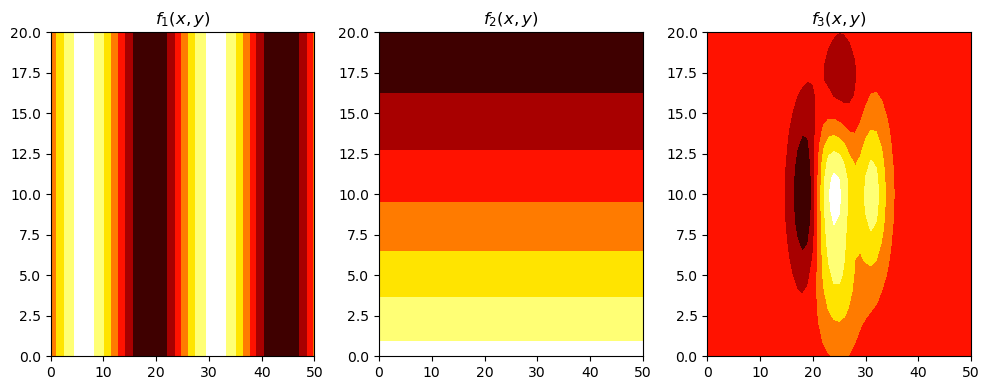

In [3]:
# show red, green, blue channels separately
image_r = image_arr[:,:,0]
image_g = image_arr[:,:,1]
image_b = image_arr[:,:,2]
print('r min/max: ',image_r.min(),image_r.max())
print('g min/max: ',image_g.min(),image_g.max())
print('b min/max: ',image_b.min(),image_b.max())

fig,axs = plt.subplots(1,3,figsize=(10,4))
axs[0].set_title('$f_1(x,y)$')
axs[1].set_title('$f_2(x,y)$')
axs[2].set_title('$f_3(x,y)$')
axs[0].contourf(image_r,vmin=0,vmax=255,cmap='hot')
axs[1].contourf(image_g,vmin=0,vmax=255,cmap='hot')
axs[2].contourf(image_b,vmin=0,vmax=255,cmap='hot')
plt.tight_layout()

----